In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
import datetime
from statsmodels.stats.weightstats import ztest

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.utils import shuffle
import hashlib
from base64 import b64encode
import collections

* –†–∞–∑–±–∏–≤–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –≥—Ä—É–ø–ø—ã: –≥–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–æ–ª–∏, —Å–æ–∑–¥–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
* –î–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞: MDE, –ø—Ä–∏–º–µ—Ä –¥–∏–∑–∞–π–Ω–∞



# –†–∞–∑–±–∏–≤–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –≥—Ä—É–ø–ø—ã

In [3]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/2019-Dec.csv.zip >> 2019-Dec.csv.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0Warning: Failed to open the file 2019-Dec.csv.zip: Permission denied

  0 73.7M    0  4134    0     0   1676      0 12:49:16  0:00:02 12:49:14  1677
curl: (23) Failure writing output to destination


In [5]:
shop_df = pd.read_csv('2019-Dec.csv.zip')

BadZipFile: File is not a zip file

In [ ]:
shop_df.head()

event_time        event_type  product_id          category_id  \
0  2019-12-01 00:00:00 UTC  remove_from_cart     5712790  1487580005268456287   
1  2019-12-01 00:00:00 UTC              view     5764655  1487580005411062629   
2  2019-12-01 00:00:02 UTC              cart        4958  1487580009471148064   
3  2019-12-01 00:00:05 UTC              view     5848413  1487580007675986893   
4  2019-12-01 00:00:07 UTC              view     5824148  1487580005511725929   

  category_code      brand  price    user_id  \
0           NaN      f.o.x   6.27  576802932   
1           NaN        cnd  29.05  412120092   
2           NaN     runail   1.19  494077766   
3           NaN  freedecor   0.79  348405118   
4           NaN        NaN   5.56  576005683   

                           user_session  
0  51d85cb0-897f-48d2-918b-ad63965c12dc  
1  8adff31e-2051-4894-9758-224bfa8aec18  
2  c99a50e8-2fac-4c4d-89ec-41c05f114554  
3  722ffea5-73c0-4924-8e8f-371ff8031af4  
4  28172809-7e4a-45ce-bab0-5efa90117cd5

–£ –Ω–∞—Å –µ—Å—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ –ª–æ–≥–∏. –î–æ–ø—É—Å—Ç–∏–º, –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞ –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑–±–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –≥—Ä—É–ø–ø—ã

1. –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ –∫–æ–ª–æ–Ω–∫–µ, –ø–æ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ–º —Ä–∞–∑–±–∏–≤–∞—Ç—å
2. –í—ã–±–∏—Ä–∞–µ–º —Ö—ç—à-—Ñ—É–Ω–∫—Ü–∏—é, —Å–æ–ª—å –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—É—é –∫–æ–ª–æ–Ω–∫—É —Ö—ç—à–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–π–¥–∏
3. –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ —á–∏—Å–ª–æ–≤–æ–π –≤–∏–¥ –∏ –±–µ—Ä–µ–º –æ—Å—Ç–∞—Ç–æ–∫ –æ—Ç —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 2. –ü–æ –æ—Å—Ç–∞—Ç–∫—É –≤—ã—Å—Ç–∞–≤–ª—è–µ–º –≥—Ä—É–ø–ø—É

https://python.readthedocs.io/en/stable/library/hashlib.html

In [ ]:
shop_df['hash'] = ((shop_df['user_id'].astype(str)) + '#' + 'av8MC4yMseo=').apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

shop_df['hash_int'] = shop_df['hash'].str.slice(start=-6).apply(int, base=16)

shop_df['group'] = ((shop_df['hash'].str.slice(start=-6).apply(int, base=16) % 2).map(lambda x: 'A' if x == 0 else 'B'))

In [ ]:
shop_df.head(5)

event_time        event_type  product_id          category_id  \
0  2019-12-01 00:00:00 UTC  remove_from_cart     5712790  1487580005268456287   
1  2019-12-01 00:00:00 UTC              view     5764655  1487580005411062629   
2  2019-12-01 00:00:02 UTC              cart        4958  1487580009471148064   
3  2019-12-01 00:00:05 UTC              view     5848413  1487580007675986893   
4  2019-12-01 00:00:07 UTC              view     5824148  1487580005511725929   

  category_code      brand  price    user_id  \
0           NaN      f.o.x   6.27  576802932   
1           NaN        cnd  29.05  412120092   
2           NaN     runail   1.19  494077766   
3           NaN  freedecor   0.79  348405118   
4           NaN        NaN   5.56  576005683   

                           user_session  \
0  51d85cb0-897f-48d2-918b-ad63965c12dc   
1  8adff31e-2051-4894-9758-224bfa8aec18   
2  c99a50e8-2fac-4c4d-89ec-41c05f114554   
3  722ffea5-73c0-4924-8e8f-371ff8031af4   
4  28172809-7e4a-45ce-bab0-5efa90117cd5   

                                                hash  hash_int group  \
0  6c6abc4f2077ee735acc10873aeec1e84c73fdc61368db...    484344     A   
1  1d801c27dc25cc0d23e8807a40e5b67b598ba43f953845...   3251533     B   
2  fe7130fd86b413dba79ce99577835460ab1d98a665f962...   7807910     A   
3  ebbd986195fccc1fdd7193a8218b612bbe752ee6a2ecc1...   8920812     A   
4  36d2843862fbcf92392839a9cba65b6522717b91f514f8...  12591374     A   

                                               hash1  hash_int1 group1  \
0  5b676ad629652a4d713db01ba8bcdfcae696c4872b913d...    9919161      B   
1  29615577734a1c3964fdfa8d564fb216da320f26454b85...    1616237      B   
2  4ee8dc63655dace6f7d7a33137e00943fee3267734a003...   13069186      A   
3  d87726014ebd86854fdfb50e752b79553345531caa8f39...    7242593      B   
4  d2c08d0ffdf8f69414e39c374a83aa28ae851f44b895fd...   16398820      A   

                                               hash2  hash_int2 group2  
0  6c6abc4f2077ee735acc10873aeec1e84c73fdc61368db...     484344      A  
1  1d801c27dc25cc0d23e8807a40e5b67b598ba43f953845...    3251533      B  
2  fe7130fd86b413dba79ce99577835460ab1d98a665f962...    7807910      A  
3  ebbd986195fccc1fdd7193a8218b612bbe752ee6a2ecc1...    8920812      A  
4  36d2843862fbcf92392839a9cba65b6522717b91f514f8...   12591374      A

In [ ]:
shop_df.groupby(['group'], as_index=False).count()

group  event_time  event_type  product_id  category_id  category_code  \
0     A     1752819     1752819     1752819      1752819          29077   
1     B     1780467     1780467     1780467      1780467          29388   

     brand    price  user_id  user_session     hash  hash_int    hash1  \
0  1005037  1752819  1752819       1752419  1752819   1752819  1752819   
1  1017960  1780467  1780467       1780088  1780467   1780467  1780467   

   hash_int1   group1  
0    1752819  1752819  
1    1780467  1780467

In [ ]:
shop_df.groupby(['group'], as_index=False).nunique()

group  event_time  event_type  product_id  category_id  category_code  \
0     A     1098371           4       41325          467             10   
1     B     1104935           4       41902          471             10   

   brand  price  user_id  user_session    hash  hash_int  
0    249   2061   184843        415021  184843    182859  
1    251   2061   185311        424821  185311    183287

In [ ]:
def salt_generator(salt=None):
    import os
    from base64 import b64encode # –∫–æ–¥–∏—Ä—É–µ—Ç –±–∞–π—Ç–æ–ø–æ–¥–æ–±–Ω—ã–π –æ–±—ä–µ–∫—Ç —Å –ø–æ–º–æ—â—å—é Base64 –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—É—é –±–∞–π—Ç–æ–≤—É—é —Å—Ç—Ä–æ–∫—É.
    salt = os.urandom(8)

    return b64encode(salt).decode('ascii')

# '''os.urandom() method is used to generate a string of size random bytes suitable for cryptographic use
#    or we can say this method generates a string containing random characters.'''
# https://www.geeksforgeeks.org/python-os-urandom-method/

In [ ]:
M = [salt_generator() for _ in range(10)]

In [ ]:
L

['z8/udaZor0g=',
 'qVhbeCThQNs=',
 'iUx5PQrofmM=',
 'p9xQY4i/fEw=',
 'NChWszytB/U=',
 '5pB0ouLjXU4=',
 '93nMGu+OTNA=',
 'NFy3RkZdMLM=',
 '28ty2gFkUd8=',
 'iNlfVx4ZpXk=']

In [ ]:
M

['WeKZiKGbSro=',
 '0Ny62xIjzLY=',
 '+TSWwJe0/gI=',
 'iP/4OJfJzAA=',
 'uABRi2kfHQM=',
 'OFwCZvrsdHU=',
 '0cHJJWCIoyw=',
 '0ZRf2lXrW8Y=',
 '8gvCZP6lssM=',
 '3pmzcMwCOs8=']

In [ ]:
# –î–µ–ª–∏–º –Ω–∞ 2 —Ä–∞–≤–Ω—ã–µ –≥—Ä—É–ø–ø—ã
def groups_splitter(df, columns, user_salt=None):

    if user_salt == None:
        salt = salt_generator()
    else:
        salt = user_salt

    df['hash'] = ((df['user_id'].astype(str)) + '#' + salt).apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

    df['group'] = ((df['hash'].str.slice(start=-6).apply(int, base=16) % 2).map(lambda x: 'A' if x == 0 else 'B'))

    return df[columns].drop_duplicates()

–ü—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫ —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç

In [ ]:
shop_df = shop_df.drop(columns=['group_x', 'group_y']) # –¥—Ä–æ–ø–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏, –µ—Å–ª–∏ –æ–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–π

In [ ]:
shop_df.head(3) # –ø—Ä–æ–≤–µ—Ä—è–µ–º, –≤—Å–µ –ª–∏ –æ–∫–µ–π

event_time        event_type  product_id          category_id  \
0  2019-12-01 00:00:00 UTC  remove_from_cart     5712790  1487580005268456287   
1  2019-12-01 00:00:00 UTC              view     5764655  1487580005411062629   
2  2019-12-01 00:00:02 UTC              cart        4958  1487580009471148064   

  category_code   brand  price    user_id  \
0           NaN   f.o.x   6.27  576802932   
1           NaN     cnd  29.05  412120092   
2           NaN  runail   1.19  494077766   

                           user_session  
0  51d85cb0-897f-48d2-918b-ad63965c12dc  
1  8adff31e-2051-4894-9758-224bfa8aec18  
2  c99a50e8-2fac-4c4d-89ec-41c05f114554

In [ ]:
groups = groups_splitter(shop_df.copy(), ['user_id', 'group']) # –ø–µ—Ä–µ–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞, —á—Ç–æ–±—ã –∏—Å—Ö–æ–¥–Ω—ã–π –Ω–µ –º–µ–Ω—è–ª—Å—è
shop_df = pd.merge(shop_df, groups, how='left', on=['user_id']) # –¥–∂–æ–π–Ω–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ª–æ–≥–∞–º–∏ —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º —é–∑–µ—Ä-–≥—Ä—É–ø–ø–∞

In [ ]:
shop_df.head(5)

event_time        event_type  product_id          category_id  \
0  2019-12-01 00:00:00 UTC  remove_from_cart     5712790  1487580005268456287   
1  2019-12-01 00:00:00 UTC              view     5764655  1487580005411062629   
2  2019-12-01 00:00:02 UTC              cart        4958  1487580009471148064   
3  2019-12-01 00:00:05 UTC              view     5848413  1487580007675986893   
4  2019-12-01 00:00:07 UTC              view     5824148  1487580005511725929   

  category_code      brand  price    user_id  \
0           NaN      f.o.x   6.27  576802932   
1           NaN        cnd  29.05  412120092   
2           NaN     runail   1.19  494077766   
3           NaN  freedecor   0.79  348405118   
4           NaN        NaN   5.56  576005683   

                           user_session group  
0  51d85cb0-897f-48d2-918b-ad63965c12dc     A  
1  8adff31e-2051-4894-9758-224bfa8aec18     B  
2  c99a50e8-2fac-4c4d-89ec-41c05f114554     B  
3  722ffea5-73c0-4924-8e8f-371ff8031af4     B  
4  28172809-7e4a-45ce-bab0-5efa90117cd5     B

In [ ]:
max_date = shop_df['event_time'].max()
min_date = shop_df['event_time'].min()
print(min_date, max_date)

2019-12-01 00:00:00 UTC 2019-12-31 23:59:57 UTC


# –î–∏–∑–∞–π–Ω –ê–í-—Ç–µ—Å—Ç–∞: —Ñ–æ—Ä–º—É–ª–∞ MDE

<center>
<img src="https://raw.githubusercontent.com/YuriyKotov/datasets/master/mde.png" height="150" width="500">
</center>

–ö–∞–∫ –≤—ã—á–∏—Å–ª–∏—Ç—å –∫–≤–∞–Ω—Ç–∏–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è?

–¢–∞–±–ª–∏—Ü—ã —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∑–¥–µ—Å—å: https://studfile.net/preview/3795082/page:2/

In [ ]:
from scipy.stats import norm

In [ ]:
norm.ppf(1-(0.05 / 2), loc=0, scale=1)

1.959963984540054

In [ ]:
norm.ppf(1-0.2, loc=0, scale=1)

0.8416212335729143

In [ ]:
# –¢–µ–ø–µ—Ä—å –º–æ–∂–µ–º –Ω–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é:
def get_mde(metric_vec, alpha=0.05, beta=0.2):

    metric_mean, metric_std, metric_n = metric_vec.mean(), metric_vec.std(), metric_vec.count()

    z_alpha = norm.ppf(1 - (alpha / 2), loc=0, scale=1)
    z_beta = norm.ppf(1 - beta, loc=0, scale=1)

    mde = (z_alpha + z_beta)*metric_std / np.sqrt(metric_n)

    return mde*100/metric_mean

In [ ]:
# –û–ø—Ä–æ–±—É–µ–º –Ω–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—é–∑–µ—Ä–Ω–æ–π –º–µ—Ç—Ä–∏–∫–µ

shop_df_users = shop_df[['user_id', 'group']].drop_duplicates()
shop_df_users['metric'] = np.random.randint(100, size=shop_df_users.shape[0])

In [ ]:
shop_df_users.head()

In [ ]:
get_mde(shop_df_users['metric'], alpha=0.05, beta=0.2)

0.26862170380554434

In [ ]:
get_mde(shop_df_users['metric'], alpha=0.05, beta=0.3)

0.23820593420116978

# –ü—Ä–∏–º–µ—Ä –¥–∏–∑–∞–π–Ω–∞

In [ ]:
import requests

# download dataset by chunks
url = "https://github.com/sharthZ23/your-second-recsys/raw/master/data_kion.zip"

req = requests.get(url, stream=True)

with open('data_kion.zip', "wb") as fd:
    total_size_in_bytes = int(req.headers.get('Content-Length', 0))
    progress_bar = tqdm(desc='kion dataset download', total=total_size_in_bytes, unit='iB', unit_scale=True)
    for chunk in req.iter_content(chunk_size=2 ** 20):
        progress_bar.update(len(chunk))
        fd.write(chunk)


kion dataset download: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 78.8M/78.8M [2:06:54<00:00, 10.3kiB/s]

kion dataset download:  12%|‚ñà‚ñè        | 9.44M/78.8M [00:00<00:00, 94.0MiB/s]
kion dataset download:  37%|‚ñà‚ñà‚ñà‚ñã      | 29.4M/78.8M [00:00<00:00, 152MiB/s] 
kion dataset download:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 50.3M/78.8M [00:00<00:00, 176MiB/s]
kion dataset download:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 74.4M/78.8M [00:00<00:00, 199MiB/s]

In [ ]:
# –†–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞–µ–º –∞—Ä—Ö–∏–≤ –∏–∑ 3 —Ñ–∞–π–ª–æ–≤
import zipfile

with zipfile.ZipFile('data_kion.zip', 'r') as zip_ref:
    zip_ref.extractall()

## üì∫ –î–∞–Ω–Ω—ã–µ: –¥–∞—Ç–∞—Å–µ—Ç –ö–ò–û–ù
- **–ø—Ä–æ—Å–º–æ—Ç—Ä—ã** —Ñ–∏–ª—å–º–æ–≤ –∏ —Å–µ—Ä–∏–∞–ª–æ–≤ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ KION
- –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è—Ö
- –¥–∞–Ω–Ω—ã–µ –æ–± –∞–π—Ç–µ–º–∞—Ö (—Ñ–∏–ª—å–º—ã, —Å–µ—Ä–∏–∞–ª—ã –∏ —Ç.–¥.)

In [ ]:
interactions = pd.read_csv('data_kion/interactions_df.csv')
users = pd.read_csv('data_kion/users.csv')
items = pd.read_csv('data_kion/items.csv')


kion dataset download: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 78.8M/78.8M [00:13<00:00, 199MiB/s]

In [ ]:
interactions.head(5)

# user_id - —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
# item_id - —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–æ–Ω—Ç–µ–Ω—Ç–∞
# last_watch_dt - –ø–æ—Å–ª–µ–¥–Ω—è—è –¥–∞—Ç–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —é–∑–µ—Ä–æ–º –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–Ω—Ç–∞
# total_dur - —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–Ω—Ç–∞ —é–∑–µ—Ä–æ–º (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö)
# watched_pct - –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–Ω—Ç–∞ –æ—Ç –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

user_id  item_id last_watch_dt  total_dur  watched_pct
0   176549     9506    2021-05-11       4250         72.0
1   699317     1659    2021-05-29       8317        100.0
2   656683     7107    2021-05-09         10          0.0
3   864613     7638    2021-07-05      14483        100.0
4   964868     9506    2021-04-30       6725        100.0

In [ ]:
interactions.shape

(5476251, 5)

In [ ]:
users.head()

# user_id - —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
# kids_flg = 0 - –¥–µ—Ç–µ–π –Ω–µ—Ç, –µ—Å–ª–∏ 1 - –¥–µ—Ç–∏ –µ—Å—Ç—å
# income - –≥—Ä—É–ø–ø–∞, –≤ –∫–æ—Ç–æ—Ä—É—é —é–∑–µ—Ä –æ—Ç–Ω–µ—Å–µ–Ω –ø–æ –¥–æ—Ö–æ–¥—É
# age - –≥—Ä—É–ø–ø–∞, –≤ –∫–æ—Ç–æ—Ä—É—é —é–∑–µ—Ä –æ—Ç–Ω–µ—Å–µ–Ω –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É
# sex - –ø–æ–ª

user_id        age        income sex  kids_flg
0   973171  age_25_34  income_60_90   –ú         1
1   962099  age_18_24  income_20_40   –ú         0
2  1047345  age_45_54  income_40_60   –ñ         0
3   721985  age_45_54  income_20_40   –ñ         0
4   704055  age_35_44  income_60_90   –ñ         0

In [ ]:
users.shape

(840197, 5)

In [ ]:
users.groupby('age', as_index=False).count()[['age', 'user_id']]

age  user_id
0   age_18_24   127672
1   age_25_34   233926
2   age_35_44   207043
3   age_45_54   135925
4   age_55_64    75265
5  age_65_inf    46271

In [ ]:
items.head(5)

item_id content_type                 title      title_orig  release_year  \
0    10711         film        –ü–æ–≥–æ–≤–æ—Ä–∏ —Å –Ω–µ–π  Hable con ella        2002.0   
1     2508         film           –ì–æ–ª—ã–µ –ø–µ—Ä—Ü—ã    Search Party        2014.0   
2    10716         film      –¢–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Å–∏–ª–∞  Tactical Force        2011.0   
3     7868         film                45 –ª–µ—Ç        45 Years        2015.0   
4    16268         film  –í—Å–µ —Ä–µ—à–∞–µ—Ç –º–≥–Ω–æ–≤–µ–Ω–∏–µ             NaN        1978.0   

                                             genres       countries  for_kids  \
0           –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã         –ò—Å–ø–∞–Ω–∏—è       NaN   
1                  –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏             –°–®–ê       NaN   
2  –∫—Ä–∏–º–∏–Ω–∞–ª, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –±–æ–µ–≤–∏–∫–∏, –∫–æ–º–µ–¥–∏–∏          –ö–∞–Ω–∞–¥–∞       NaN   
3                      –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã  –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è       NaN   
4                –¥—Ä–∞–º—ã, —Å–ø–æ—Ä—Ç, —Å–æ–≤–µ—Ç—Å–∫–∏–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã            –°–°–°–†       NaN   

   age_rating   studios         directors  \
0        16.0       NaN  –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä   
1        16.0       NaN    –°–∫–æ—Ç –ê—Ä–º—Å—Ç—Ä–æ–Ω–≥   
2        16.0       NaN  –ê–¥–∞–º –ü. –ö–∞–ª—Ç—Ä–∞—Ä–æ   
3        16.0       NaN         –≠–Ω–¥—Ä—é –•—ç–π   
4        12.0  –õ–µ–Ω—Ñ–∏–ª—å–º  –í–∏–∫—Ç–æ—Ä –°–∞–¥–æ–≤—Å–∫–∏–π   

                                              actors  \
0  –ê–¥–æ–ª—å—Ñ–æ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –ê–Ω–∞ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –î–∞—Ä–∏–æ –ì—Ä–∞–Ω–¥–∏...   
1  –ê–¥–∞–º –ü–∞–ª–ª–∏, –ë—Ä–∞–π–∞–Ω –•–∞—Å–∫–∏, –î–∂.–ë. –°–º—É–≤, –î–∂–µ–π—Å–æ–Ω ...   
2  –ê–¥—Ä–∏–∞–Ω –•–æ–ª–º—Å, –î–∞—Ä—Ä–µ–Ω –®–∞–ª–∞–≤–∏, –î–∂–µ—Ä—Ä–∏ –í–∞—Å—Å–µ—Ä–º–∞–Ω,...   
3  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –†–∏–¥–¥–ª—Å—Ç–æ–Ω-–ë–∞—Ä—Ä–µ—Ç—Ç, –î–∂–µ—Ä–∞–ª—å–¥–∏–Ω –î–∂–µ–π–º...   
4  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ê–±–¥—É–ª–æ–≤, –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –î–µ–º—å—è–Ω–µ–Ω–∫–æ, –ê–ª–µ–∫—Å...   

                                         description  \
0  –ú–µ–ª–æ–¥—Ä–∞–º–∞ –ª–µ–≥–µ–Ω–¥–∞—Ä–Ω–æ–≥–æ –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä–∞ ¬´–ü–æ–≥–æ...   
1  –£–º–æ—Ä–∏—Ç–µ–ª—å–Ω–∞—è —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –∫–æ–º–µ–¥–∏—è –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω—É—é...   
2  –ü—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π —Ä–µ—Å—Ç–ª–µ—Ä –°—Ç–∏–≤ –û—Å—Ç–∏–Ω (¬´–í—Å–µ –∏–ª–∏ ...   
3  –®–∞—Ä–ª–æ—Ç—Ç–∞ –†—ç–º–ø–ª–∏–Ω–≥, –¢–æ–º –ö–æ—Ä—Ç–Ω–∏, –î–∂–µ—Ä–∞–ª—å–¥–∏–Ω –î–∂–µ–π...   
4  –†–∞—Å—á–µ—Ç–ª–∏–≤–∞—è —á–∞—Ä–æ–≤–Ω–∏—Ü–∞ –∏–∑ —Å–æ–≤–µ—Ç—Å–∫–æ–≥–æ –∫–∏–Ω–æ—Ö–∏—Ç–∞ ¬´...   

                                            keywords  
0  –ü–æ–≥–æ–≤–æ—Ä–∏, –Ω–µ–π, 2002, –ò—Å–ø–∞–Ω–∏—è, –¥—Ä—É–∑—å—è, –ª—é–±–æ–≤—å, ...  
1  –ì–æ–ª—ã–µ, –ø–µ—Ä—Ü—ã, 2014, –°–®–ê, –¥—Ä—É–∑—å—è, —Å–≤–∞–¥—å–±—ã, –ø—Ä–µ–æ...  
2  –¢–∞–∫—Ç–∏—á–µ—Å–∫–∞—è, —Å–∏–ª–∞, 2011, –ö–∞–Ω–∞–¥–∞, –±–∞–Ω–¥–∏—Ç—ã, –≥–∞–Ω–≥...  
3  45, –ª–µ—Ç, 2015, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –±—Ä–∞–∫, –∂–∏–∑–Ω—å, –ª—é...  
4  –í—Å–µ, —Ä–µ—à–∞–µ—Ç, –º–≥–Ω–æ–≤–µ–Ω–∏–µ, 1978, –°–°–°–†, —Å–∏–ª—å–Ω—ã–µ, –∂...

In [ ]:
items.shape

(15963, 14)

In [ ]:
items.groupby('content_type', as_index=False).count()[['content_type', 'item_id']]

content_type  item_id
0         film    12002
1       series     3961

In [ ]:
# –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
interactions['last_watch_dt'] = pd.to_datetime(interactions['last_watch_dt']).map(lambda x: x.date())
interactions['user_id'] = interactions['user_id'].astype(str)

print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —é–∑–µ—Ä–æ–≤ –≤ interactions: {interactions['user_id'].nunique():_}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–π—Ç–µ–º–æ–≤ –≤ interactions: {interactions['item_id'].nunique():_}")

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —é–∑–µ—Ä–æ–≤ –≤ interactions: 962_179
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–π—Ç–µ–º–æ–≤ –≤ interactions: 15_706


In [ ]:
# –û—Ü–µ–Ω–∏–º —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ 1 –∏ 2 –Ω–µ–¥–µ–ª–∏

In [ ]:
max_date = interactions['last_watch_dt'].max()
min_date = interactions['last_watch_dt'].min()
print(min_date, max_date)

2021-03-13 2021-08-22


In [ ]:
interactions[interactions['last_watch_dt'] >= max_date - datetime.timedelta(days=7)]['user_id'].nunique()

185907

In [ ]:
interactions[interactions['last_watch_dt'] >= max_date - datetime.timedelta(days=14)]['user_id'].nunique()

279129

In [ ]:
# –≤—ã–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –∑–∞ –æ–¥–Ω—É (–ø–æ—Å–ª–µ–¥–Ω—é—é) –Ω–µ–¥–µ–ª—é
week = interactions[interactions['last_watch_dt'] >= max_date - datetime.timedelta(days=7)]
week = week.groupby('user_id', as_index=False).agg({'total_dur': sum})

<ipython-input-152-eb5ee8923e02>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  week = week.groupby('user_id', as_index=False).agg({'total_dur': sum})


In [ ]:
week.head()
# TVTu

user_id  total_dur
0        1       1593
1  1000001         52
2  1000003        625
3  1000008       3691
4  1000009       2444

## –í—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫–∏

- —Ö–æ—Ç–∏–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫—É –¥–ª–∏–Ω—É –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è (total_dur –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ) - —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –æ—Å–Ω–æ–≤–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞, –Ω–∞ –∫–æ—Ç–æ—Ä—É—é —Å–º–æ—Ç—Ä–∏—Ç –±–∏–∑–Ω–µ—Å

- –¢–æ –µ—Å—Ç—å —Ö–æ—Ç–∏–º, —á—Ç–æ–±—ã –≤ —Ç–µ—Å—Ç–µ –≤ –≥—Ä—É–ø–ø–µ B —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —É–≤–µ–ª–∏—á–∏–ª–∞—Å—å

# –í—ã–±–æ—Ä —ç—Ñ—Ñ–µ–∫—Ç–∞

–ü—É—Å—Ç—å –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–ø–µ —Ä–µ—à–∏–ª–∏, —á—Ç–æ –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç = 5% –∫–∞–∫ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏

### –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏

(–ø–æ–º–Ω–∏–º: –¥–∏—Å–ø–µ—Ä—Å–∏—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –Ω–µ–≤—ã—Å–æ–∫–∞—è)

<Axes: >

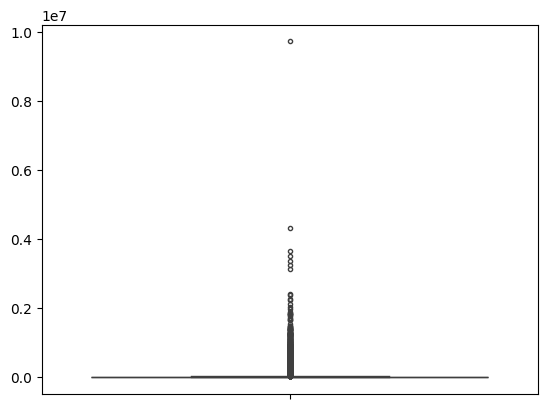

In [ ]:
sns.boxplot(week['total_dur'].values, fliersize=3)

In [ ]:
week['total_dur'].max()

9731801

In [ ]:
week['total_dur'].std()

62639.86487742628

In [ ]:
print(week.shape)
week = week[(week['total_dur'] < week['total_dur'].std() * 3)]
print(week.shape)

(185907, 2)
(183790, 2)


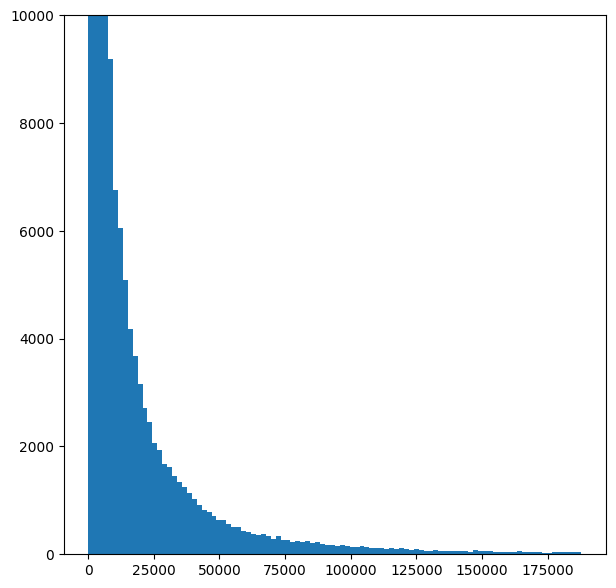

In [ ]:
week['total_dur'].hist(bins=100, figsize=(7,7))
plt.ylim([0, 10000])
plt.grid(False)

<details>
  <summary>üìù –ü–æ–¥—Å–∫–∞–∑–∫–∞ </summary>
    
–î–∞–Ω–Ω—ã–µ –Ω–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ª—é–¥–µ–π —Å–º–æ—Ç—Ä—è—Ç –ø–æ–Ω–µ–º–Ω–æ–≥—É, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ.

–ß—Ç–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç? –ß—Ç–æ —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ (t-test, z-test) –¥–ª—è –Ω–∞—à–µ–π –º–µ—Ç—Ä–∏–∫–∏ "–¥–ª–∏–Ω–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞" –Ω–µ –ø–æ–¥–æ–π–¥—É—Ç, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ —Ç—Ä–µ–±—É—é—Ç —É—Å–ª–æ–≤–∏—è –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    
</details>

## –í—ã–±–æ—Ä –∫—Ä–∏—Ç–µ—Ä–∏—è
<details>
  <summary>üìù –ü–æ–¥—Å–∫–∞–∑–∫–∞ </summary>
–ê —á—Ç–æ –µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏?

- –ù–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è
- –î–ª—è –Ω–µ–≥–æ –Ω—É–∂–µ–Ω —Ä—è–¥ –Ω–µ–ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    
</details>

## –ê–ª–≥–æ—Ä–∏—Ç–º –ø–æ–¥–±–æ—Ä–∞ –ø–æ—Ö–æ–∂–∏—Ö –≥—Ä—É–ø–ø

- –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ö—ç—à —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —ç—Ç–æ–≥–æ. –ü–æ—Å—á–∏—Ç–∞–µ–º —Ö—ç—à –æ—Ç –∞–π–¥–∏, –Ω–∞–π–¥–µ–º –æ—Å—Ç–∞—Ç–æ–∫ –æ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 2 (—Ç–∞–∫ –∫–∞–∫ 2 –≥—Ä—É–ø–ø—ã) –∏ –ø–æ –æ—Å—Ç–∞—Ç–∫—É –æ–ø—Ä–µ–¥–µ–ª–∏–º –∫ –∫–∞–∫–æ–π –≥—Ä—É–ø–ø–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å. –¢–æ –µ—Å—Ç—å –ø–æ –∞–π–¥–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –æ–Ω–∞ —Ä–∞–∑–æ–±—å–µ—Ç –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ 2 –≥—Ä—É–ø–ø—ã.


## –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è
- –æ—Ü–µ–Ω–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p_value
- –æ—Ü–µ–Ω–∫–∞ –º–æ—â–Ω–æ—Å—Ç–∏
- –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p_value** –ø—Ä–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–º –ø–æ–¥–±–æ—Ä–µ –ø–∞—Ä—ã –º–µ—Ç—Ä–∏–∫–∞ + –∫—Ä–∏—Ç–µ—Ä–∏–π -  —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

**–î–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ—Å—Ç—å (–ö–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å)** - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –Ω–∞–π–¥–µ—Ç —Ä–∞–∑–ª–∏—á–∏–µ, –∫–æ–≥–¥–∞ –µ–≥–æ –Ω–µ—Ç

$$significance = Pr(\text{reject }H_0 | H_0 \text{ is true})$$

**–ú–æ—â–Ω–æ—Å—Ç—å** - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞–π–¥–µ—Ç —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –æ–Ω–æ –µ—Å—Ç—å

$$power = Pr(\text{reject }H_0 | H_1 \text{ is true})$$

In [ ]:
week1_group = groups_splitter(week, columns=['user_id', 'total_dur', 'group'], user_salt='20241204')
week1_group.head()

user_id  total_dur group
0        1       1593     A
1  1000001         52     A
2  1000003        625     B
3  1000008       3691     B
4  1000009       2444     B

In [ ]:
week.groupby(by='group', as_index=False).count()

group  user_id  total_dur   hash
0     A    91903      91903  91903
1     B    91887      91887  91887

In [ ]:
from scipy.stats import mannwhitneyu

# –ø—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ–¥ –∫—Ä–∏—Ç–µ—Ä–∏—è
u, p = mannwhitneyu(week[week['group'] == 'A']['total_dur'].values,
                    week[week['group'] == 'B']['total_dur'].values)

print(f"p_value = {p}")

p_value = 0.09960455835462702


–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p_value - –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ

In [ ]:
pvalues = []

for i in tqdm(range(50)):  # 1000

  week1_hash = groups_splitter(week, columns=['user_id', 'total_dur', 'group'])

  u, p = mannwhitneyu(
        week1_hash[week1_hash['group'] == 'A']['total_dur'].values,
        week1_hash[week1_hash['group'] == 'B']['total_dur'].values
    )
  pvalues.append(p)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:53<00:00,  1.06s/it]


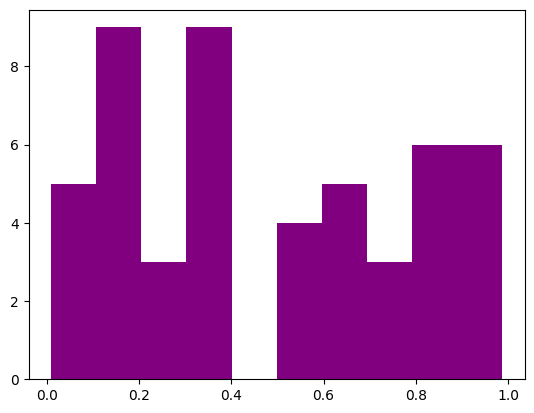

In [ ]:
plt.hist(pvalues, bins=10, color='purple');

<details>
  <summary>üìù –ü–æ–¥—Å–∫–∞–∑–∫–∞ </summary>
–û–π. –ö–∞–∂–µ—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç. –ê –ø–æ—á–µ–º—É —Ç–∞–∫ –ø—Ä–æ–∏–∑–æ—à–ª–æ?
    </details>

<details>
  <summary>üìù –ü–æ–¥—Å–∫–∞–∑–∫–∞ </summary>
–î–∞–≤–∞–π—Ç–µ –µ—â–µ –ø—Ä–æ–≤–µ—Ä–∏–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ (–æ —Ç–æ–º, —á—Ç–æ –ø–æ–ª—É—á–∏–≤—à–µ–µ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ pvalues –µ—Å—Ç—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ).
    </details>

In [ ]:
import scipy.stats

stat, p_value = scipy.stats.kstest(pvalues, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

if p_value < 0.05:
    print(f'p_value = {p_value} - p_values –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
else:
    print(f'p_value = {p_value} - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

p_value = 0.10522293368449531 - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


<details>
  <summary>üìù –ü–æ–¥—Å–∫–∞–∑–∫–∞ </summary>
–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –≤—ã–±–æ—Ä–∫–µ
</details>

In [ ]:
print(f"% —É–Ω–∏–∫. –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä—É–ø–ø—ã –ê = {round(week1_hash[week1_hash['group'] == 'A']['total_dur'].nunique() / week1_hash[week1_hash['group'] == 'A'].shape[0] * 100, 2)}")
print(f"% —É–Ω–∏–∫. –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä—É–ø–ø—ã B = {round(week1_hash[week1_hash['group'] == 'B']['total_dur'].nunique() / week1_hash[week1_hash['group'] == 'B'].shape[0] * 100, 2)}")

% —É–Ω–∏–∫. –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä—É–ø–ø—ã –ê = 34.24
% —É–Ω–∏–∫. –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä—É–ø–ø—ã B = 34.49


In [ ]:
week1_hash.groupby(by='total_dur', as_index=False).count()[['total_dur', 'user_id']].sort_values('user_id', ascending=False).head(20)

In [ ]:
week1_hash.groupby(by='total_dur', as_index=False).count()[['total_dur', 'user_id']].sort_values('user_id', ascending=False).tail(20)

–ü–æ–ø—Ä–æ–±—É–µ–º —á—Ç–æ —Ç–æ —Å–¥–µ–ª–∞—Ç—å —Å —ç—Ç–æ–π –º–µ—Ç—Ä–∏–∫–æ–π

–û–¥–∏–Ω –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ - –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏, —Å–ø–æ—Å–æ–± —Å–Ω–∏–∑–∏—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é

In [ ]:
week['total_dur_ln'] = np.log2(week['total_dur'])

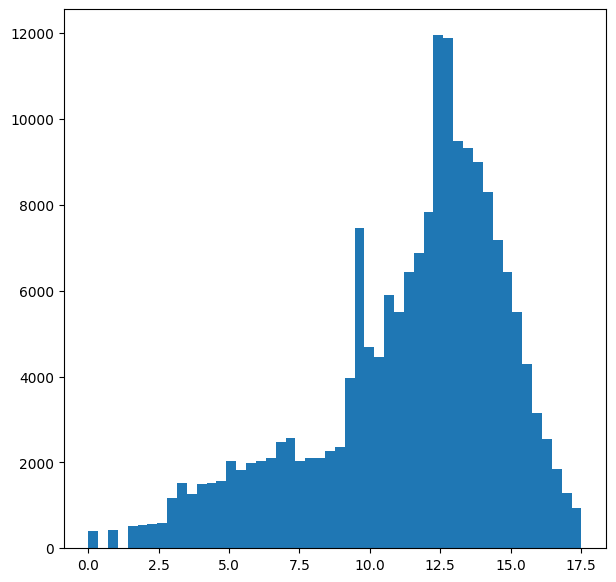

In [ ]:
week['total_dur_ln'].hist(bins=50, figsize=(7,7))
plt.grid(False)

In [ ]:
stat, p_value = scipy.stats.kstest(pvalues, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

if p_value < 0.05:
    print(f'p_value = {p_value} - p_values –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
else:
    print(f'p_value = {p_value} - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

p_value = 0.10522293368449531 - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


In [ ]:
pvalues = []

for i in tqdm(range(50)):  # 1000

  week1_hash = groups_splitter(week, columns=['user_id', 'total_dur_ln', 'group'])

  u, p = mannwhitneyu(
        week1_hash[week1_hash['group'] == 'A']['total_dur_ln'].values,
        week1_hash[week1_hash['group'] == 'B']['total_dur_ln'].values
    )
  pvalues.append(p)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:55<00:00,  1.11s/it]


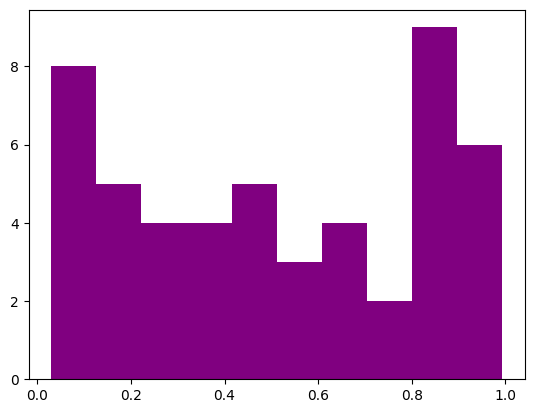

In [ ]:
plt.hist(pvalues, bins=10, color='purple');

In [ ]:
stat, p_value = scipy.stats.kstest(pvalues, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

if p_value < 0.05:
    print(f'p_value = {p_value} - p_values –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
else:
    print(f'p_value = {p_value} - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

p_value = 0.3892163415621642 - p_values —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


# –î—Ä—É–≥–æ–π –ø–æ–¥—Ö–æ–¥ –∫ –¥–∏–∑–∞–π–Ω—É - –±—É—Ç—Å—Ç—Ä–∞–ø

–ö—Ä–∏—Ç–µ—Ä–∏–π - –±—É—Ç—Å—Ç—Ä–∞–ø (bootstrap)

–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç (—Ç–µ–æ—Ä–∏—è)
- –î–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã A –∏ B m —Ä–∞–∑ –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è –ø—Å–µ–≤–¥–æ–≤—ã–±–æ—Ä–∫–∏ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –∫–∞–∫ –≤—ã–±–æ—Ä–∫–∏ —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º

- –ù–∞ –∫–∞–∂–¥–æ–π –ø–∞—Ä–µ –ø—Å–µ–≤–¥–æ–≤—ã–±–æ—Ä–æ–∫ —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–∫–æ—Ç–æ—Ä–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, –∫–æ—Ç–æ—Ä—É—é –º—ã –æ—Ü–µ–Ω–∏–≤–∞–µ–º

- –î–∞–ª—å—à–µ —Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –º–µ–∂–¥—É –ø—Å–µ–≤–¥–æ–≤—ã–±–æ—Ä–∫–∞–º–∏ [2.5%; 97.5 %]

- –°—á–∏—Ç–∞–µ–º –∫–≤–∞–Ω—Ç–∏–ª–∏

- –°–º–æ—Ç—Ä–∏–º, –≥–¥–µ –ª–µ–∂–∏—Ç –Ω–∞—à–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤ —ç—Ç–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏

–ö–∞–∫ —Ä–µ–∞–ª–∏–∑—É–µ–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ

–†–µ–∞–ª–∏–∑—É–µ–º —Ü–∏–∫–ª (—Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è - –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ –Ω–µ –º–µ–Ω–µ–µ 1000 —Ä–∞–∑), –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –∫–æ—Ç–æ—Ä–æ–≥–æ:

- —Å–æ–∑–¥–∞–µ–º –≤—ã–±–æ—Ä–∫—É —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º

- —Å—á–∏—Ç–∞–µ–º –µ–µ —Å—Ä–µ–¥–Ω–µ–µ

- –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –∫–≤–∞–Ω—Ç–∏–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö (–∏–∑ —Ü–∏–∫–ª–∞)

- –¥–∞–ª–µ–µ –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å, –≤–æ—à–µ–ª –ª–∏ 0 –≤ —ç—Ç–æ—Ç –∏–Ω—Ç–µ—Ä–≤–∞–ª

In [ ]:
def salt_generator(salt=None):
    import os
    from base64 import b64encode
    salt = os.urandom(8)

    return b64encode(salt).decode('ascii')


def get_bootstrap_array(arr):
    return np.random.choice(arr, replace=True, size=len(arr))


def calc_bootstrap_mean(arr, size=1000):
    result = np.empty(size)
    for i in range(size):
        result[i] = np.mean(get_bootstrap_array(arr))
    return result

def get_p_value(dist):
    dist = np.array(dist)
    x = (dist > 0).mean()
    pvalue = min(x, 1 - x) * 2
    return pvalue

## –í–∞–ª–∏–¥–∏—Ä—É–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æc—Ç—å (significance)

–ú–æ–¥–µ–ª–∏—Ä—É–µ–º AA-test: –ø—Ä–æ–≥–æ–Ω—è–µ–º –±—É—Ç—Å—Ç—Ä–∞–ø –∫—Ä–∏—Ç–µ—Ä–∏–π, –Ω–µ –¥–æ–±–∞–≤–ª—è—è —ç—Ñ—Ñ–µ–∫—Ç –∫ –≥—Ä—É–ø–ø–µ –í. –•–æ—Ç–∏–º, —á—Ç–æ–±—ã –∫—Ä–∏—Ç–µ—Ä–∏–π –ù–ï –Ω–∞—à–µ–ª —Ä–∞–∑–ª–∏—á–∏–π –≤ –≤—ã–±–æ—Ä–∫–∞—Ö. –ï—Å–ª–∏ —Ç–æ—á–Ω–µ–µ, —Ç–æ –Ω–∞—à–µ–ª –Ω–µ –±–æ–ª–µ–µ —á–µ–º  $\alpha$ —Å–ª—É—á–∞—è—Ö.

In [ ]:
correctness = []
values = []

for i in tqdm(range(50)): # –≤ –¥–∑ –∏—Å–ø–æ–ª—å–∑—É–µ–º 1000 –∏—Ç–µ—Ä–∞—Ü–∏–π

    new_df = groups_splitter(week.copy(), columns=['user_id', 'total_dur', 'group'], user_salt=salt_generator()).drop_duplicates()


    vec_a = new_df[(new_df['group'] == 'A')]['total_dur']
    vec_b = new_df[(new_df['group'] == 'B')]['total_dur']

    #bootstrap
    sample_a_mean = calc_bootstrap_mean(vec_a, size=1000) # –Ω–∞ –±—É—Ç—Å—Ç—Ä—ç–ø–µ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞
    sample_b_mean = calc_bootstrap_mean(vec_b, size=1000)
    values.append(sample_a_mean - sample_b_mean)

    left_side, right_side = np.percentile(sample_a_mean - sample_b_mean,
                                                  [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]) # —Å—á–∏—Ç–∞–µ–º 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö

    correctness.append(not left_side <= 0 <= right_side)

    test_correctness = collections.Counter(correctness)

print(f'significance: {test_correctness[1]/(test_correctness[1] + test_correctness[0])*100}%')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [04:05<00:00,  4.90s/it]

significance: 2.0%


In [ ]:
p_values = [get_p_value(dist) for dist in values]

Text(0.5, 1.0, '–ë—É—Ç—Å—Ç—Ä–µ–ø —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ p_value')

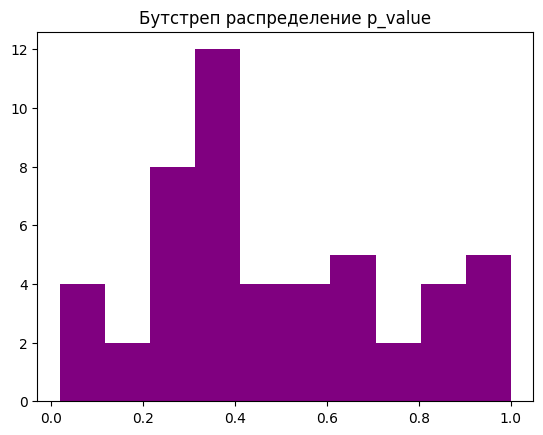

In [ ]:
plt.hist(p_values, bins=10, color='purple');
plt.title(f"–ë—É—Ç—Å—Ç—Ä–µ–ø —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ p_value")

In [ ]:
power = []
values = []

for i in tqdm(range(50)): # –≤ –¥–∑ –∏—Å–ø–æ–ª—å–∑—É–µ–º 1000 –∏—Ç–µ—Ä–∞—Ü–∏–π

    new_df = groups_splitter(week.copy(), columns=['user_id', 'total_dur', 'group'], user_salt=salt_generator()).drop_duplicates()


    vec_a = new_df[(new_df['group'] == 'A')]['total_dur']
    vec_b = new_df[(new_df['group'] == 'B')]['total_dur'] * (1+0.01) # –¥–æ–∫–∏–¥–∞–≤–∞–µ–º —ç—Ñ—Ñ–µ–∫—Ç –≤ 1%

    #bootstrap
    sample_a_mean = calc_bootstrap_mean(vec_a, size=1000) # –Ω–∞ –±—É—Ç—Å—Ç—Ä—ç–ø–µ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞
    sample_b_mean = calc_bootstrap_mean(vec_b, size=1000)
    values.append(sample_a_mean - sample_b_mean)

    left_side, right_side = np.percentile(sample_a_mean - sample_b_mean,
                                                  [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]) # —Å—á–∏—Ç–∞–µ–º 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö

    power.append(not left_side <= 0 <= right_side)

    test_power = collections.Counter(power)

print(f'power: {test_power[1]/(test_power[1] + test_power[0])*100}%')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [04:07<00:00,  4.96s/it]

power: 22.0%


In [ ]:
power = []
values = []

for i in tqdm(range(50)): # –≤ –¥–∑ –∏—Å–ø–æ–ª—å–∑—É–µ–º 1000 –∏—Ç–µ—Ä–∞—Ü–∏–π

    new_df = groups_splitter(week.copy(), columns=['user_id', 'total_dur', 'group'], user_salt=salt_generator()).drop_duplicates()


    vec_a = new_df[(new_df['group'] == 'A')]['total_dur']
    vec_b = new_df[(new_df['group'] == 'B')]['total_dur'] * (1+0.03)  # –¥–æ–∫–∏–¥–∞–≤–∞–µ–º —ç—Ñ—Ñ–µ–∫—Ç –≤ 3%

    #bootstrap
    sample_a_mean = calc_bootstrap_mean(vec_a, size=1000) # –Ω–∞ –±—É—Ç—Å—Ç—Ä—ç–ø–µ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞
    sample_b_mean = calc_bootstrap_mean(vec_b, size=1000)
    values.append(sample_a_mean - sample_b_mean)

    left_side, right_side = np.percentile(sample_a_mean - sample_b_mean,
                                                  [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)]) # —Å—á–∏—Ç–∞–µ–º 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö

    power.append(not left_side <= 0 <= right_side)

    test_power = collections.Counter(power)

print(f'power: {test_power[1]/(test_power[1] + test_power[0])*100}%')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [03:58<00:00,  4.77s/it]

power: 92.0%


# –î–ó 1:


!!!  –í—Å–µ —Å—á–∏—Ç–∞–µ–º –Ω–∞ 1000 –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö


### –î–∏–∑–∞–π–Ω —Ç–µ—Å—Ç–∞ –±—É—Ç—Å—Ç—Ä–µ–ø
1. –ò–∑ interactions –≤–∑—è—Ç—å –¥–∞–Ω–Ω—ã–µ –∑–∞ 2 –ø–æ—Å–ª–µ–¥–Ω–∏–µ –Ω–µ–¥–µ–ª–∏ (2021-08-09 –ø–æ 2021-08-22)

2. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –Ω–∞ –±—É—Ç—Å—Ç—Ä–µ–ø–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –µ–µ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –∑–∞ 1 –Ω–µ–¥–µ–ª—é (–ø–æ—Å—á–∏—Ç–∞–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ) (2 –±–∞–ª–ª–∞)

3. –ù–∞ –¥–≤—É—Ö –Ω–µ–¥–µ–ª—è—Ö –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–æ—â–Ω–æ—Å—Ç—å. –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –≤ –æ–¥–Ω—É –∏–∑ –≥—Ä—É–ø–ø –¥–æ–∫–∏–Ω—É—Ç—å —ç—Ñ—Ñ–µ–∫—Ç. –î–æ–∫–∏–Ω—å—Ç–µ —ç—Ñ—Ñ–µ–∫—Ç –≤ 1%, 3% –∏ 5% –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—É—é –º–æ—â–Ω–æ—Å—Ç—å (3 –±–∞–ª–ª–∞ –∑–∞ —Ä–∞—Å—á–µ—Ç + 2 –±–∞–ª–ª–∞ –∑–∞ –ø–æ–¥—Ä–æ–±—Ä–æ–µ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ)

4. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ MDE, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ 2—Ö –Ω–µ–¥–µ–ª—è—Ö. –í –∫–∞—á–µ—Å—Ç–≤–µ alpha –∏ beta –ø–æ–¥—Å—Ç–∞–≤—å—Ç–µ –≤–∞—à–∏ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –æ—à–∏–±–∫–∏ 1 –∏ 2 —Ä–æ–¥–∞. –£—á–∏—Ç—ã–≤–∞–π—Ç–µ —á—Ç–æ —É –Ω–∞—Å —Ñ–æ—Ä–º—É–ª–∞ –¥–ª—è MDE —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è t-test –∏–ª–∏ z-test (3 –±–∞–ª–ª–∞)


### –î–∏–∑–∞–π–Ω –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ

1. –ü–æ—Å—á–∏—Ç–∞—Ç—å –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π –¥–∏–∑–∞–π–Ω –¥–ª—è:
  - –±—É—Ç—Å—Ç—Ä–µ–ø + –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (4 –±–∞–ª–ª–∞)
  - –º–∞–Ω–Ω–∞-—É–∏—Ç–Ω–∏ + –º–µ—Ç—Ä–∏–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (4 –±–∞–ª–ª–∞)
  - –º–∞–Ω–Ω–∞-—É–∏—Ç–Ω–∏ + –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (4 –±–∞–ª–ª–∞)
  - t-test + –º–µ—Ç—Ä–∏–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (4 –±–∞–ª–ª–∞)
  - t-test + –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (4 –±–∞–ª–ª–∞)
2. –ü–æ–¥—Ä–æ–±–Ω–æ –æ–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã, –∫–∞–∫–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã —Ç–æ—á–Ω–æ –Ω–µ –ø–æ–¥—Ö–æ–¥—è—Ç –∏ –ø–æ—á–µ–º—É. –û–±—ä—è—Å–Ω–∏—Ç—å –∑–∞—á–µ–º –º—ã –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫—É –∏ —á—Ç–æ –Ω–∞–º —ç—Ç–æ –¥–∞–µ—Ç. –ê—Ä–≥—É–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ –≤—ã–±—Ä–∞—Ç—å 1 –ø–∞—Ä—É (–º–µ—Ç—Ä–∏–∫–∞ + –∫—Ä–∏—Ç–µ—Ä–∏–π) –∫–æ—Ç–æ—Ä—ã–º –≤—ã –±—É–¥–µ—Ç–µ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –ê–ë —Ç–µ—Å—Ç –∏ –∫–∞–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç –º—ã —Å–º–æ–∂–µ–º –æ—Ç–ª–æ–≤–∏—Ç—å –≤ –Ω–∞—à–µ–º —Ç–µ—Å—Ç–µ. (5 –±–∞–ª–ª–æ–≤)


### A/B —Ç–µ—Å—Ç
1) –ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º —á—Ç–æ —É –Ω–∞—Å –ø—Ä–æ—à–µ–ª —Ç–µ—Å—Ç, –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–µ –∂–µ —Å–∞–º—ã–µ –¥–∞–Ω–Ω—ã–µ –∑–∞ 2 –Ω–µ–¥–µ–ª–∏

2) –ó–∞–Ω—É–ª–∏—Ç–µ –¥–ª—è –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π total_dur, —É –∫–æ—Ç–æ—Ä—ã—Ö total_dur < 500. –ò—Ö –ù–ï –£–ë–ò–†–ê–ï–ú, –∞ –ø—Ä–æ—Å—Ç–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è, –ø—Ä–∏–Ω–∏–º–∞—è –∑–∞ –Ω—É–ª–µ–≤—ã–µ, –Ω–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Ç–∞–∫–∂–µ —É—á–∏—Ç—ã–≤–∞–µ–º –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ (2 –±–∞–ª–ª–∞)

3) –†–∞–∑–±–µ–π—Ç–µ –∏—Ö —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –Ω–∞ –¥–≤–µ —Ä–∞–≤–Ω—ã–µ –≥—Ä—É–ø–ø—ã, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é groups_splitter –∏ —Å–æ–ª—å = 'kiontestmodel20210805' (1 –±–∞–ª–ª–∞)

4) –û–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ –º–æ–¥–µ–ª—å –≤ –≥—Ä—É–ø–ø–µ –í –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –ª—É—á—à–µ, —á–µ–º –≤ –≥—Ä—É–ø–ø–µ –ê –Ω–∞ 2.5%, –ø—Ä–∏—á–µ–º —ç—Ñ—Ñ–µ–∫—Ç —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–∏–ª—Å—è –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–∞ 10% —Å–∞–º—ã—Ö —Å–º–æ—Ç—Ä—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –¥–æ–∫–∏–Ω—å—Ç–µ —Ç–∞–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ. –ù—É–∂–Ω–æ –º–µ—Ç—Ä–∏–∫—É total_dur —É–≤–µ–ª–∏—á–∏—Ç—å –Ω–∞ 2.5% –¥–ª—è 10% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Å–∞–º—ã–º –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω—ã–º —Å–º–æ—Ç—Ä–µ–Ω–∏–µ–º. (2 –±–∞–ª–ª–∞)

5) –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–∞–∫–æ–≥–æ —Ç–µ—Å—Ç–∞ –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã (10 –±–∞–ª–ª–æ–≤)



